In [31]:
%config IPCompleter.greedy = True

In [32]:
import numpy as np

import torch
from torch import nn
import torch.nn.functional as F

from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import helper

In [33]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = datasets.MNIST('MNIST_data', download = True, train = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size = 64, shuffle = True)

In [34]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.Softmax(dim = 1)
    
)

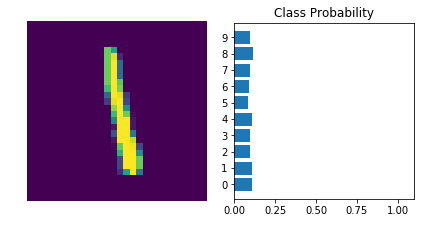

In [35]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0, :])
helper.view_classify(images[0].view(1, 28, 28), ps)